<a href="https://colab.research.google.com/github/sturu1/github-first/blob/master/2020_07_06_%EC%98%A4%EC%A0%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SimpleRNN 레이어     176페이지

In [6]:
import numpy as np

X = []
Y = []
for i in range(6):
  lst = list(range(i, i+4))
  X.append(list(map(lambda c: [c/10], lst)))
  Y.append((i+4)/10)

X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
  print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.4031669 ]
 [0.5441784 ]
 [0.65340364]
 [0.7308126 ]
 [0.7816807 ]
 [0.81260735]]


In [11]:
print(model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]])))
print(model.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]])))

[[0.829411]]
[[0.23974644]]


# LSTM 레이어  181페이지

1. cell gate 기억
2. forget gate 
3. input gate 새롭게 추출한 특징
4. output gate 

In [12]:
import numpy as np

X = []
Y = []

for i in range(3000):
  lst = np.random.rand(100)
  idx = np.random.choice(100, 2, replace=False)
  zeros = np.zeros(100)
  zeros[idx] = 1
  X.append(np.array(list(zip(zeros, lst))))
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.55814868]
 [1.         0.67532271]
 [0.         0.95121581]
 [0.         0.68468502]
 [0.         0.24193717]
 [0.         0.99926464]
 [0.         0.90130643]
 [0.         0.02088023]
 [0.         0.40424586]
 [0.         0.70539667]
 [0.         0.80241406]
 [0.         0.370403  ]
 [0.         0.17728187]
 [0.         0.7962993 ]
 [0.         0.79373351]
 [0.         0.20193479]
 [0.         0.98920967]
 [0.         0.24009197]
 [0.         0.58453064]
 [0.         0.13962583]
 [0.         0.8484645 ]
 [0.         0.36580341]
 [0.         0.84099191]
 [0.         0.66411087]
 [0.         0.85201823]
 [0.         0.82567313]
 [0.         0.99606265]
 [0.         0.12258626]
 [1.         0.26821638]
 [0.         0.57258986]
 [0.         0.12813634]
 [0.         0.04283146]
 [0.         0.91038451]
 [0.         0.43646716]
 [0.         0.46277671]
 [0.         0.89606956]
 [0.         0.22265081]
 [0.         0.28326651]
 [0.         0.37875164]
 [0.         0.9572551 ]


In [13]:
print(len(X), len(Y))

3000 3000


In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.SimpleRNN(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 30)                1830      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0270 - val_loss: 0.0725
Epoch 2/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0268 - val_loss: 0.0720
Epoch 3/100
64/64 [==============================] - 2s 32ms/step - loss: 0.0254 - val_loss: 0.0719
Epoch 4/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0255 - val_loss: 0.0732
Epoch 5/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0249 - val_loss: 0.0720
Epoch 6/100
64/64 [==============================] - 2s 35ms/step - loss: 0.0251 - val_loss: 0.0704
Epoch 7/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0243 - val_loss: 0.0713
Epoch 8/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0244 - val_loss: 0.0725
Epoch 9/100
64/64 [==============================] - 2s 31ms/step - loss: 0.0236 - val_loss: 0.0715
Epoch 10/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0230 - val_loss: 0.0695

In [20]:
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1

print('correctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 10ms/step - loss: 0.0831
0.037643116130860715 	 0.1024338 	diff: 0.06479068456646594
0.7566858754751916 	 0.5502948 	diff: 0.20639105898120358
0.7462236268725224 	 0.67629015 	diff: 0.06993347241543013
0.31013333792165165 	 0.31372964 	diff: 0.0035963059000646558
0.5885166101087551 	 0.17775899 	diff: 0.4107576183904629
correctness: 10.909090909090908 %


In [21]:
import numpy as np

X = []
Y = []

for i in range(3000):
  lst = np.random.rand(100)
  idx = np.random.choice(100, 2, replace=False)
  zeros = np.zeros(100)
  zeros[idx] = 1
  X.append(np.array(list(zip(zeros, lst))))
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
                             tf.keras.layers.LSTM(units=30),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

for i in range(5):
  print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail += 1

print('correctness:', (440 - fail) / 440 * 100, '%')

[[0.00000000e+00 2.09654015e-01]
 [0.00000000e+00 3.04666181e-01]
 [0.00000000e+00 2.20684024e-01]
 [1.00000000e+00 2.80213731e-01]
 [0.00000000e+00 8.46930924e-01]
 [0.00000000e+00 9.96994103e-01]
 [0.00000000e+00 8.90763520e-01]
 [0.00000000e+00 5.32093707e-01]
 [0.00000000e+00 1.47319459e-01]
 [0.00000000e+00 7.95796704e-02]
 [0.00000000e+00 4.23314091e-01]
 [0.00000000e+00 5.96554439e-01]
 [0.00000000e+00 5.61871783e-01]
 [0.00000000e+00 9.34513609e-01]
 [0.00000000e+00 5.05740982e-01]
 [0.00000000e+00 4.48465928e-01]
 [0.00000000e+00 1.17079305e-01]
 [0.00000000e+00 5.28178468e-01]
 [0.00000000e+00 1.10219750e-01]
 [1.00000000e+00 7.86551725e-01]
 [0.00000000e+00 2.57548360e-01]
 [0.00000000e+00 1.83292915e-01]
 [0.00000000e+00 8.96684163e-01]
 [0.00000000e+00 8.93632668e-01]
 [0.00000000e+00 2.49107059e-01]
 [0.00000000e+00 8.69799726e-01]
 [0.00000000e+00 2.89523897e-01]
 [0.00000000e+00 4.66459047e-02]
 [0.00000000e+00 3.04869661e-01]
 [0.00000000e+00 3.36735924e-01]
 [0.000000

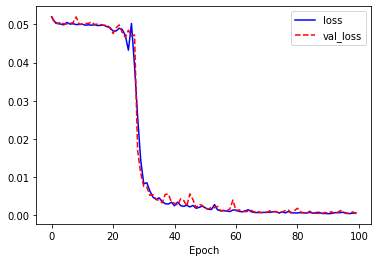

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()